# jose

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import sys

try:
    import jose
except ModuleNotFoundError:
    print('jose not in PYTHONPATH, needs to be added')
    print('Attempting to add temporarily to demonstrate example functionality')
    sys.path.insert(1, os.path.join(os.getcwd(), 'PyJose'))
    import jose
    
from astropy.io import fits as pyfits

imageDir = os.path.join(os.getcwd(), 'PyJose', 'images')

jose not in PYTHONPATH, needs to be added
Attempting to add temporarily to demonstrate example functionality


## Frame with flat background and perpendicular trace

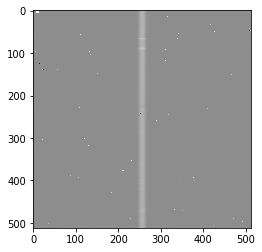

In [2]:
frame1 = pyfits.open(os.path.join(imageDir, 'ex1.fits'))[0]
plt.imshow(frame1.data, cmap='gray', norm=LogNorm())

In [3]:
Q = frame1.header.get('EPADU')
rn = frame1.header.get('RDNOISE') / Q
leftBound = 240
rightBound = 270
varim = np.abs(frame1.data) / Q + rn**2

In [5]:
optimal_spectrum = jose.optimal_extraction(frame1.data, varim, rn, Q, (leftBound, rightBound))

/mnt/c/Development/PyJose/jose/python/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/c/Development/PyJose/jose/python/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/c/Development/PyJose/jose/python/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/c/Development/PyJose/jose/python/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])
/mnt/c/Development/PyJose/jose/python/PyJose/jose/create_profile.py:21: RankWarning: Polyfit may be poorly conditioned
  w = 1 / variance[:,i][mask])


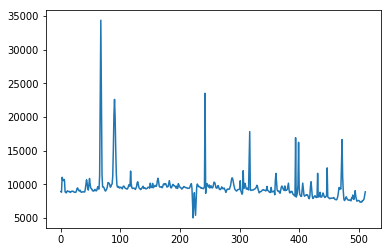

In [6]:
plt.plot(optimal_spectrum)